# 라이브러리 불러오기

In [586]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import catboost

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import OrdinalEncoder

In [937]:
train = pd.read_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\train.csv')
test = pd.read_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\test.csv')
submission = pd.read_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\sample_submission.csv')

# Feature 설명

## index   



## gender: 성별   (o)



## car: 차량 소유 여부   (o)



## reality: 부동산 소유 여부   (o)



## child_num: 자녀 수   


## income_total: 연간 소득  (o)



## income_type: 소득 분류   
## ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']   



## edu_type: 교육 수준   
## ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']   



## family_type: 결혼 여부   
## ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']   



## house_type: 생활 방식   
## ['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']   



## DAYS_BIRTH: 출생일   (o)
## 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미   



## DAYS_EMPLOYED: 업무 시작일   (o)   
## 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미,양수 값은 고용되지 않은 상태를 의미함   



## FLAG_MOBIL: 핸드폰 소유 여부  (o) 



## work_phone: 업무용 전화 소유 여부   (o)



## phone: 전화 소유 여부  (o) 



## email: 이메일 소유 여부   (o)



## occyp_type: 직업 유형	   												




## family_size: 가족 규모  (o) 



## begin_month: 신용카드 발급 월 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미 (o)     


## credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도   
## => 낮을 수록 높은 신용의 신용카드 사용자를 의미함   

In [938]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [939]:
print(train.shape)
print(test.shape)
train.info()

(26457, 20)
(10000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-n

# 데이터 전처리
## 1. 결측치 제거

In [940]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [941]:
train_and_test = [train, test]

## - Child_num: 자녀의 유무로 구분

<AxesSubplot:>

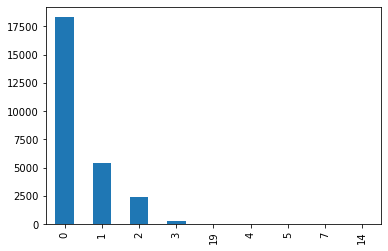

In [942]:
train['child_num'].value_counts(sort=False).plot.bar()

In [943]:
for dataset in train_and_test:
    dataset.loc[dataset['child_num'] != 0, 'child_num'] = 'Children_Yes'
    dataset.loc[dataset['child_num'] == 0, 'child_num'] = 'Children_No'

## - income_total

(array([1.6212e+04, 8.3300e+03, 1.5300e+03, 2.0600e+02, 1.2100e+02,
        4.4000e+01, 3.0000e+00, 2.0000e+00, 4.0000e+00, 5.0000e+00]),
 array([  27000.,  181800.,  336600.,  491400.,  646200.,  801000.,
         955800., 1110600., 1265400., 1420200., 1575000.]),
 <BarContainer object of 10 artists>)

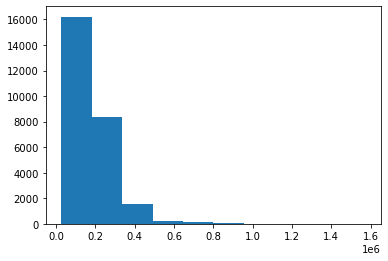

In [944]:
plt.hist(train['income_total'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c3a5f804a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3a5f80a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3a5f80240>],
 'medians': [<matplotlib.lines.Line2D at 0x1c3a6067048>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c3a6067320>],
 'means': []}

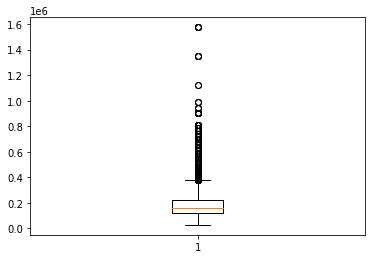

In [945]:
plt.boxplot(train['income_total']) # 이상치가 존재하나 범주형 데이터로 변형할 것이기에 그대로 사용한다.

In [946]:
for dataset in train_and_test:
    Q1 = dataset['income_total'].quantile(0.2)
    Q2 = dataset['income_total'].quantile(0.4)
    Q3 = dataset['income_total'].quantile(0.6)
    Q4 = dataset['income_total'].quantile(0.8)
    Q5 = dataset['income_total'].quantile(1.0)
    bins_income = [0, Q1, Q2, Q3, Q4, Q5]
    labels_income = ['Very_low', 'Low', 'Medium', 'High', 'Very_high']
    cuts = pd.cut(dataset['income_total'], bins = bins_income, labels = labels_income, include_lowest= True)
    dataset['income_total'] = cuts

In [947]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,Children_No,Very_low,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,Children_No,Low,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,Children_No,Very_low,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,Children_No,Very_low,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,Children_No,High,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,F,Y,Y,Children_No,High,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0
9996,36453,M,Y,Y,Children_No,High,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0
9997,36454,F,N,Y,Children_No,Very_high,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0
9998,36455,F,Y,N,Children_No,Medium,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,NaN,2.0,-33.0


## - Discrete variables

In [948]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

(array([1878., 5357.,    0., 1789.,    0.,  846.,  106.,    0.,   14.,
          10.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

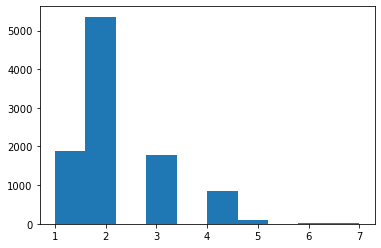

In [949]:
plt.hist(test['family_size'])

In [950]:
test.describe()

,index,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.00000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31456.50000,-16020.466400,59776.690400,1.0,0.227600,0.296300,0.085600,2.202700,-26.272400
std,2886.89568,4197.672887,138121.224504,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,26457.00000,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,28956.75000,-19483.250000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,31456.50000,-15606.000000,-1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000
75%,33956.25000,-12539.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,36456.00000,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.000000


In [951]:
for dataset in train_and_test:
    bins_family = [0, 1, 2, 21]
    labels_family = ['singe', 'double', 'more_than_double']
    cuts = pd.cut(dataset['family_size'], bins = bins_family, labels = labels_family)
    dataset['family_size'] = cuts

In [952]:
train['family_size'].isnull().sum()

0

## - income_type

In [953]:
for dataset in train_and_test:
    dataset.loc[dataset['income_type']=='Student', 'income_type'] = 'Working' # ==> student 데이터의 수가 적고 working 데이터가 크고 다양하다는 점에서 편입함.

## - edu_type

In [954]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [955]:
test.groupby(['edu_type', 'income_total'])['income_total'].value_counts() # 확인해본 결과 석박사 과정과 대졸의 소득 분포가 큰 차이를 보이지 않기에 데이터를 합침.

edu_type                       income_total  income_total
Academic degree                Low           Low                2
                               Very_high     Very_high          7
Higher education               Very_low      Very_low         358
                               Low           Low              355
                               Medium        Medium           599
                               High          High             547
                               Very_high     Very_high        843
Incomplete higher              Very_low      Very_low          46
                               Low           Low               79
                               Medium        Medium            94
                               High          High              67
                               Very_high     Very_high        104
Lower secondary                Very_low      Very_low          49
                               Low           Low               21
                  

In [956]:
for dataset in train_and_test:
    dataset.loc[dataset['edu_type']=='Academic degree', 'edu_type'] = 'Higher education'

## - family_type

In [957]:
train['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

## - house_type

In [958]:
train['house_type'].value_counts()
train['house_type'].unique()

array(['Municipal apartment', 'House / apartment', 'With parents',
       'Co-op apartment', 'Rented apartment', 'Office apartment'],
      dtype=object)

In [959]:
test.groupby(['house_type', 'income_total'])['income_total'].value_counts() # 확인해본 결과 아파트 종류들의 소득 분포가 큰 차이를 보이지 않기에 데이터를 합침.

house_type           income_total  income_total
Co-op apartment      Very_low      Very_low          16
                     Low           Low                6
                     Medium        Medium            13
                     High          High              14
                     Very_high     Very_high          9
House / apartment    Very_low      Very_low        2164
                     Low           Low             1444
                     Medium        Medium          1928
                     High          High            1545
                     Very_high     Very_high       1814
Municipal apartment  Very_low      Very_low          83
                     Low           Low               37
                     Medium        Medium            91
                     High          High              57
                     Very_high     Very_high         42
Office apartment     Very_low      Very_low          11
                     Low           Low                7


In [960]:
for dataset in train_and_test:
    houses = ['Municipal apartment', 'Co-op apartment', 'Rented apartment', 'Office apartment']
    for type in houses:
        dataset.loc[dataset['house_type']==type, 'house_type'] = 'etc_apartment'

In [961]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,Children_No,High,Commercial associate,Higher education,Married,etc_apartment,-13899,-4709,1,0,0,0,NaN,double,-6.0,1.0
1,1,F,N,Y,Children_Yes,High,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,more_than_double,-5.0,1.0
2,2,M,Y,Y,Children_No,Very_high,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,double,-22.0,2.0
3,3,F,N,Y,Children_No,High,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,double,-37.0,0.0
4,4,F,Y,Y,Children_No,Medium,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,double,-26.0,2.0


## - DAYS_EMPLOYED
-  근무일수 데이터 중 양수의 값을 가지는 데이터를 0->Unemployed로 바꾼 후 각 분위에 해당하는 데이터를 'Short', 'Medium', 'Long', 'Very_Long'로 변환함.

In [962]:
# 'DAYS_EMPLOYED' preprocessing
for dataset in train_and_test:
    dataset['DAYS_EMPLOYED'] = dataset['DAYS_EMPLOYED'].replace(365243, 0)
    dataset['DAYS_EMPLOYED'] = dataset['DAYS_EMPLOYED'].abs()

    Q1 = dataset['DAYS_EMPLOYED'].quantile(0.25)
    Q2 = dataset['DAYS_EMPLOYED'].quantile(0.50)
    Q3 = dataset['DAYS_EMPLOYED'].quantile(0.75)

    bins = [0,1, Q1, Q2, Q3, 15713]
    labels = ['Unemployed', 'Short', 'Medium', 'Long', 'Very_Long']
    cuts = pd.cut(dataset['DAYS_EMPLOYED'], bins, right=True, labels=labels, include_lowest= True)
    dataset['DAYS_EMPLOYED'] = cuts


In [963]:
train['DAYS_EMPLOYED'].value_counts()

Medium        6639
Long          6608
Very_Long     6591
Unemployed    4438
Short         2181
Name: DAYS_EMPLOYED, dtype: int64

In [964]:
test['DAYS_EMPLOYED'].isnull().sum()

0

## - DAYS_BIRTH: 
살아온 일수를 절대값을 취한 후 연단위로 바꾸어 반올림함.

In [965]:
for dataset in train_and_test:
    dataset['DAYS_BIRTH'] = (dataset['DAYS_BIRTH']/365).abs().astype(object)
    bins = [20, 30, 40, 50, 60, 70]
    labels = ['20s', '30s', '40s', '50s', '60s']
    cuts = pd.cut(dataset['DAYS_BIRTH'], bins = bins, right=True, labels=labels, include_lowest= True)
    dataset['DAYS_BIRTH'] = cuts
    # pd.get_dummies(dataset['DAYS_BIRTH'])

In [966]:
dataset['DAYS_BIRTH'].value_counts()

30s    2851
40s    2543
50s    2213
20s    1320
60s    1073
Name: DAYS_BIRTH, dtype: int64

In [967]:
train['DAYS_BIRTH'].value_counts()
train['DAYS_BIRTH'].isnull().sum()

0

In [968]:
test['DAYS_BIRTH'].value_counts()
test['DAYS_BIRTH'].isnull().sum()

0

In [969]:
train['DAYS_BIRTH'].value_counts()

30s    7588
40s    6766
50s    5739
20s    3608
60s    2756
Name: DAYS_BIRTH, dtype: int64

In [970]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          26457 non-null  int64   
 1   gender         26457 non-null  object  
 2   car            26457 non-null  object  
 3   reality        26457 non-null  object  
 4   child_num      26457 non-null  object  
 5   income_total   26457 non-null  category
 6   income_type    26457 non-null  object  
 7   edu_type       26457 non-null  object  
 8   family_type    26457 non-null  object  
 9   house_type     26457 non-null  object  
 10  DAYS_BIRTH     26457 non-null  category
 11  DAYS_EMPLOYED  26457 non-null  category
 12  FLAG_MOBIL     26457 non-null  int64   
 13  work_phone     26457 non-null  int64   
 14  phone          26457 non-null  int64   
 15  email          26457 non-null  int64   
 16  occyp_type     18286 non-null  object  
 17  family_size    26457 non-null  

## occupation

In [971]:
train.occyp_type.value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [972]:
train['occyp_type'] = train['occyp_type'].fillna('no')
test['occyp_type'] = test['occyp_type'].fillna('no')

In [973]:
for dataset in train_and_test:
    dataset.loc[(dataset['occyp_type'] == 'no')&(dataset['DAYS_EMPLOYED'] != 'Unemployed'), 'occyp_type'] = 'no_response'
    dataset.loc[(dataset['occyp_type'] == 'no')&(dataset['DAYS_EMPLOYED'] == 'Unemployed'), 'occyp_type'] = 'no_job'

In [974]:
test['occyp_type'].value_counts()

Laborers                 1699
no_job                   1697
no_response              1455
Sales staff               946
Core staff                945
Managers                  845
Drivers                   563
High skill tech staff     343
Medicine staff            343
Accountants               339
Cooking staff             198
Security staff            168
Cleaning staff            148
Private service staff     101
Secretaries                54
Waiters/barmen staff       50
Low-skill Laborers         48
HR staff                   23
IT staff                   19
Realty agents              16
Name: occyp_type, dtype: int64

In [975]:
train['occyp_type'].value_counts()

Laborers                 4512
no_job                   4438
no_response              3733
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

## begin_month
### 음수 값을 가진 데이터를 절대값을 취해주었으며, 0의 값을 가진 데이터의 경우 카드를 소지하지 않은 경우로 판단함.

In [976]:
# train['begin_month'].describe()

In [977]:
# train['begin_month'].head()
# train['begin_month'].describe() # 0의 값이 존재함 -> 어떤 의미? -> 카드를 발급받지 아니한 사람 (사유: 다양함 --> 신용불량, 소득 X, 신용등급이 낮은 사회 초년생 등)
# train['begin_month'].isnull().sum() # 결측치 없음
# len(train.loc[train['begin_month'] == 0, :]) # 카드를 소지하지 않은 사람의 수가 231명으로 보임.

In [978]:
# train['begin_month'] = train['begin_month'].abs()/12 # 음수 값을 가지던 데이터에 절대값처리.

In [979]:
# train['begin_month'].value_counts

In [980]:
# bins = [0, 0.001, 1, 2, 3, 4, 5]
# labels = ['NoCard', '0_year', '1_year', '2_year', '3_year', '4+_years']
# cuts = pd.cut(train['begin_month'], bins = bins, right=True, labels=labels, include_lowest= True)
# train['begin_month'] = cuts
# train['begin_month'].value_counts()


In [981]:
for dataset in train_and_test:
    dataset['begin_month'] = dataset['begin_month'].abs()/12
    bins = [0, 0.001, 1, 2, 3, 4, 5]
    labels = ['NoCard', '0_year', '1_year', '2_year', '3_year', '4+_years']
    cuts = pd.cut(dataset['begin_month'], bins = bins, right=True, labels=labels, include_lowest= True)
    dataset['begin_month'] = cuts

In [982]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          26457 non-null  int64   
 1   gender         26457 non-null  object  
 2   car            26457 non-null  object  
 3   reality        26457 non-null  object  
 4   child_num      26457 non-null  object  
 5   income_total   26457 non-null  category
 6   income_type    26457 non-null  object  
 7   edu_type       26457 non-null  object  
 8   family_type    26457 non-null  object  
 9   house_type     26457 non-null  object  
 10  DAYS_BIRTH     26457 non-null  category
 11  DAYS_EMPLOYED  26457 non-null  category
 12  FLAG_MOBIL     26457 non-null  int64   
 13  work_phone     26457 non-null  int64   
 14  phone          26457 non-null  int64   
 15  email          26457 non-null  int64   
 16  occyp_type     26457 non-null  object  
 17  family_size    26457 non-null  

## 트레인 테스트 셋으로 전처리

In [983]:
train_x = train.drop(['credit', 'index'], axis = 1)
train_y = train[['credit']]
test_x = test.drop('index', axis = 1)

## one_hot  encoding: pd.get_dummies()

In [984]:
# print(number)

In [987]:
cols_train = train_x.columns
cols_test = test_x.columns

In [989]:
cols_train

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month'],
      dtype='object')

In [918]:
# train_x = pd.get_dummies(train_x, drop_first= True)
# test_x = pd.get_dummies(test_x, drop_first= True)

## ordinal encoding: OrdinalEncoder

In [990]:
encoder = OrdinalEncoder()

encoder.fit(train_x.values.tolist())

train_x = encoder.transform(train_x.values.tolist())

encoder.fit(test_x.values.tolist())

test_x = encoder.transform(test_x.values.tolist())

In [921]:
train_x

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+00, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0000e+00],
       ...,
       [2.6454e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.0000e+00,
        2.0000e+00],
       [2.6455e+04, 1.0000e+00, 0.0000e+00, ..., 2.0000e+00, 4.0000e+00,
        2.0000e+00],
       [2.6456e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00]])

In [925]:
train.columns[1:-1]

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month'],
      dtype='object')

In [927]:
train_x.shape

(26457, 20)

In [991]:
train_x = pd.DataFrame(train_x, columns = cols_train)
test_x = pd.DataFrame(test_x, columns = cols_test)

In [994]:
test_x

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,1.0,1.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,18.0,0.0,4.0
1,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,1.0,0.0,3.0,0.0,2.0
2,0.0,0.0,1.0,0.0,4.0,3.0,3.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,8.0,0.0,3.0
3,1.0,1.0,0.0,0.0,4.0,0.0,3.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0
4,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0,3.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9996,1.0,1.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8.0,0.0,2.0
9997,0.0,0.0,1.0,0.0,3.0,3.0,3.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,11.0,0.0,4.0
9998,0.0,1.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,19.0,0.0,2.0


In [995]:
print(len(train_x.columns))
print(len(test_x.columns))

18
18


In [ ]:
# print(train_x.shape)
# print(test_x.shape)

# [데이터 모델링]

In [997]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  float64
 1   car            26457 non-null  float64
 2   reality        26457 non-null  float64
 3   child_num      26457 non-null  float64
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  float64
 6   edu_type       26457 non-null  float64
 7   family_type    26457 non-null  float64
 8   house_type     26457 non-null  float64
 9   DAYS_BIRTH     26457 non-null  float64
 10  DAYS_EMPLOYED  26457 non-null  float64
 11  FLAG_MOBIL     26457 non-null  float64
 12  work_phone     26457 non-null  float64
 13  phone          26457 non-null  float64
 14  email          26457 non-null  float64
 15  occyp_type     26457 non-null  float64
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
dtypes: flo

In [998]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  float64
 1   car            10000 non-null  float64
 2   reality        10000 non-null  float64
 3   child_num      10000 non-null  float64
 4   income_total   10000 non-null  float64
 5   income_type    10000 non-null  float64
 6   edu_type       10000 non-null  float64
 7   family_type    10000 non-null  float64
 8   house_type     10000 non-null  float64
 9   DAYS_BIRTH     10000 non-null  float64
 10  DAYS_EMPLOYED  10000 non-null  float64
 11  FLAG_MOBIL     10000 non-null  float64
 12  work_phone     10000 non-null  float64
 13  phone          10000 non-null  float64
 14  email          10000 non-null  float64
 15  occyp_type     10000 non-null  float64
 16  family_size    10000 non-null  float64
 17  begin_month    10000 non-null  float64
dtypes: floa

In [ ]:
# print(train_x.shape, test_x.shape, train_y.shape)

In [999]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)

Train set: 
(19842, 18)
(19842, 1)
Validation set: 
(6615, 18)
(6615, 1)


In [ ]:
# rf_clf=RandomForestClassifier()
# rf_clf.fit(X_train, y_train)
# y_pred_rf=rf_clf.predict_proba(X_val)
# rf_clf.classes_

# # print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_rf)}")

In [ ]:
# gbm_clf=GradientBoostingClassifier()
# gbm_clf.fit(X_train, y_train)
# y_pred_gbm=gbm_clf.predict_proba(X_val)

# print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_gbm)}")

In [ ]:
# ada_clf=AdaBoostClassifier()
# ada_clf.fit(X_train, y_train)
# y_pred_ada=ada_clf.predict_proba(X_val)

# print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_ada)}")

In [1000]:
cbt_clf = CatBoostClassifier()
cbt_clf.fit(X_train, y_train)
y_pred_cbt = cbt_clf.predict_proba(X_val)


print("훈련 세트 정확도: {:.3f}".format(cbt_clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(cbt_clf.score(X_val, y_val)))

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_cbt)}")

Learning rate set to 0.092151
0:	learn: 1.0546608	total: 22.5ms	remaining: 22.5s
1:	learn: 1.0195003	total: 49.1ms	remaining: 24.5s
2:	learn: 0.9911860	total: 74ms	remaining: 24.6s
3:	learn: 0.9678677	total: 94ms	remaining: 23.4s
4:	learn: 0.9488036	total: 116ms	remaining: 23s
5:	learn: 0.9329774	total: 138ms	remaining: 22.9s
6:	learn: 0.9201508	total: 159ms	remaining: 22.6s
7:	learn: 0.9093520	total: 189ms	remaining: 23.5s
8:	learn: 0.9005413	total: 227ms	remaining: 25s
9:	learn: 0.8929311	total: 271ms	remaining: 26.9s
10:	learn: 0.8864909	total: 303ms	remaining: 27.3s
11:	learn: 0.8807823	total: 361ms	remaining: 29.7s
12:	learn: 0.8761087	total: 382ms	remaining: 29s
13:	learn: 0.8721289	total: 407ms	remaining: 28.7s
14:	learn: 0.8689838	total: 427ms	remaining: 28s
15:	learn: 0.8657259	total: 447ms	remaining: 27.5s
16:	learn: 0.8628599	total: 460ms	remaining: 26.6s
17:	learn: 0.8603925	total: 473ms	remaining: 25.8s
18:	learn: 0.8583632	total: 484ms	remaining: 25s
19:	learn: 0.8566796	

In [1002]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(cbt_clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        cbt_clf.fit(X_train, y_train)
        
        predictions=cbt_clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=cbt_clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(cbt_clf)

Learning rate set to 0.092455
0:	learn: 1.0542794	total: 20.8ms	remaining: 20.8s
1:	learn: 1.0189852	total: 32.5ms	remaining: 16.2s
2:	learn: 0.9904556	total: 43.9ms	remaining: 14.6s
3:	learn: 0.9670498	total: 54.7ms	remaining: 13.6s
4:	learn: 0.9479869	total: 66.4ms	remaining: 13.2s
5:	learn: 0.9321805	total: 77.5ms	remaining: 12.8s
6:	learn: 0.9194734	total: 89.6ms	remaining: 12.7s
7:	learn: 0.9087951	total: 102ms	remaining: 12.7s
8:	learn: 0.9000493	total: 114ms	remaining: 12.5s
9:	learn: 0.8931821	total: 124ms	remaining: 12.3s
10:	learn: 0.8862435	total: 140ms	remaining: 12.6s
11:	learn: 0.8808097	total: 153ms	remaining: 12.6s
12:	learn: 0.8759315	total: 166ms	remaining: 12.6s
13:	learn: 0.8719686	total: 179ms	remaining: 12.6s
14:	learn: 0.8681345	total: 192ms	remaining: 12.6s
15:	learn: 0.8655079	total: 203ms	remaining: 12.5s
16:	learn: 0.8629969	total: 222ms	remaining: 12.9s
17:	learn: 0.8612607	total: 237ms	remaining: 13s
18:	learn: 0.8590700	total: 262ms	remaining: 13.5s
19:	le

<BarContainer object of 18 artists>

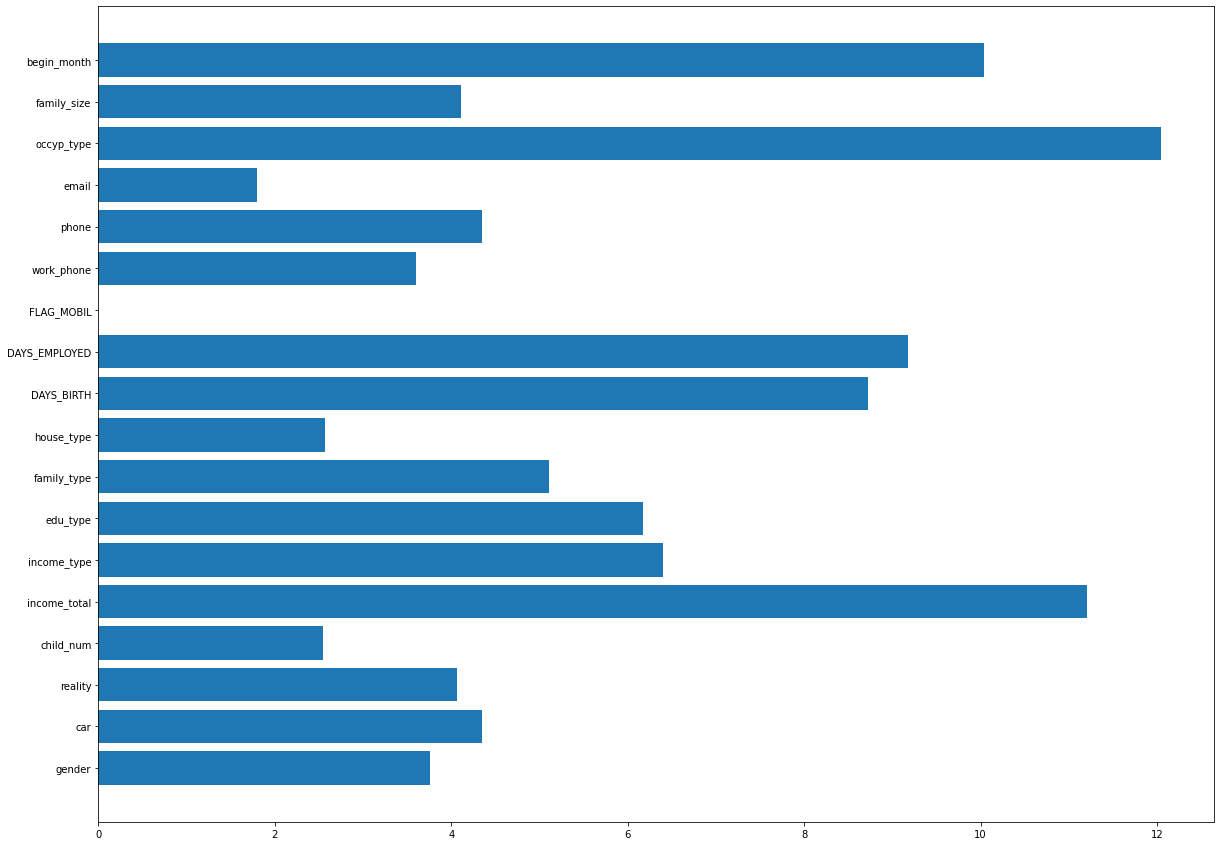

In [1003]:
cbt_clf.get_feature_importance()

plt.figure(figsize=(20, 15))

plt.barh(X_train.columns, cbt_clf.get_feature_importance())

In [1004]:
my_submission

array([[0.10854722, 0.05389425, 0.83755854],
       [0.14085961, 0.09647605, 0.76266434],
       [0.11003586, 0.22956082, 0.66040332],
       ...,
       [0.05491854, 0.12728188, 0.81779959],
       [0.09602871, 0.17265152, 0.73131977],
       [0.07634507, 0.41363525, 0.51001967]])

In [1005]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [1011]:
my_submission.shape

(10000, 3)

In [1007]:
submission.loc[:, 1:] = my_submission

In [1008]:
submission

,index,0,1,2
0,26457,0.108547,0.053894,0.837559
1,26458,0.140860,0.096476,0.762664
2,26459,0.110036,0.229561,0.660403
3,26460,0.109495,0.053374,0.837131
4,26461,0.093002,0.214925,0.692073
...,...,...,...,...
9995,36452,0.134187,0.268741,0.597072
9996,36453,0.142752,0.377045,0.480203
9997,36454,0.054919,0.127282,0.817800
9998,36455,0.096029,0.172652,0.731320


In [1009]:
# submission.to_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\submission_JH_cbt5.csv', index=False)